<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


<ipython-input-4-d97f09a55d8a>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 2].set_xticklabels(["Залишились (0)", "Пішли (1)"])


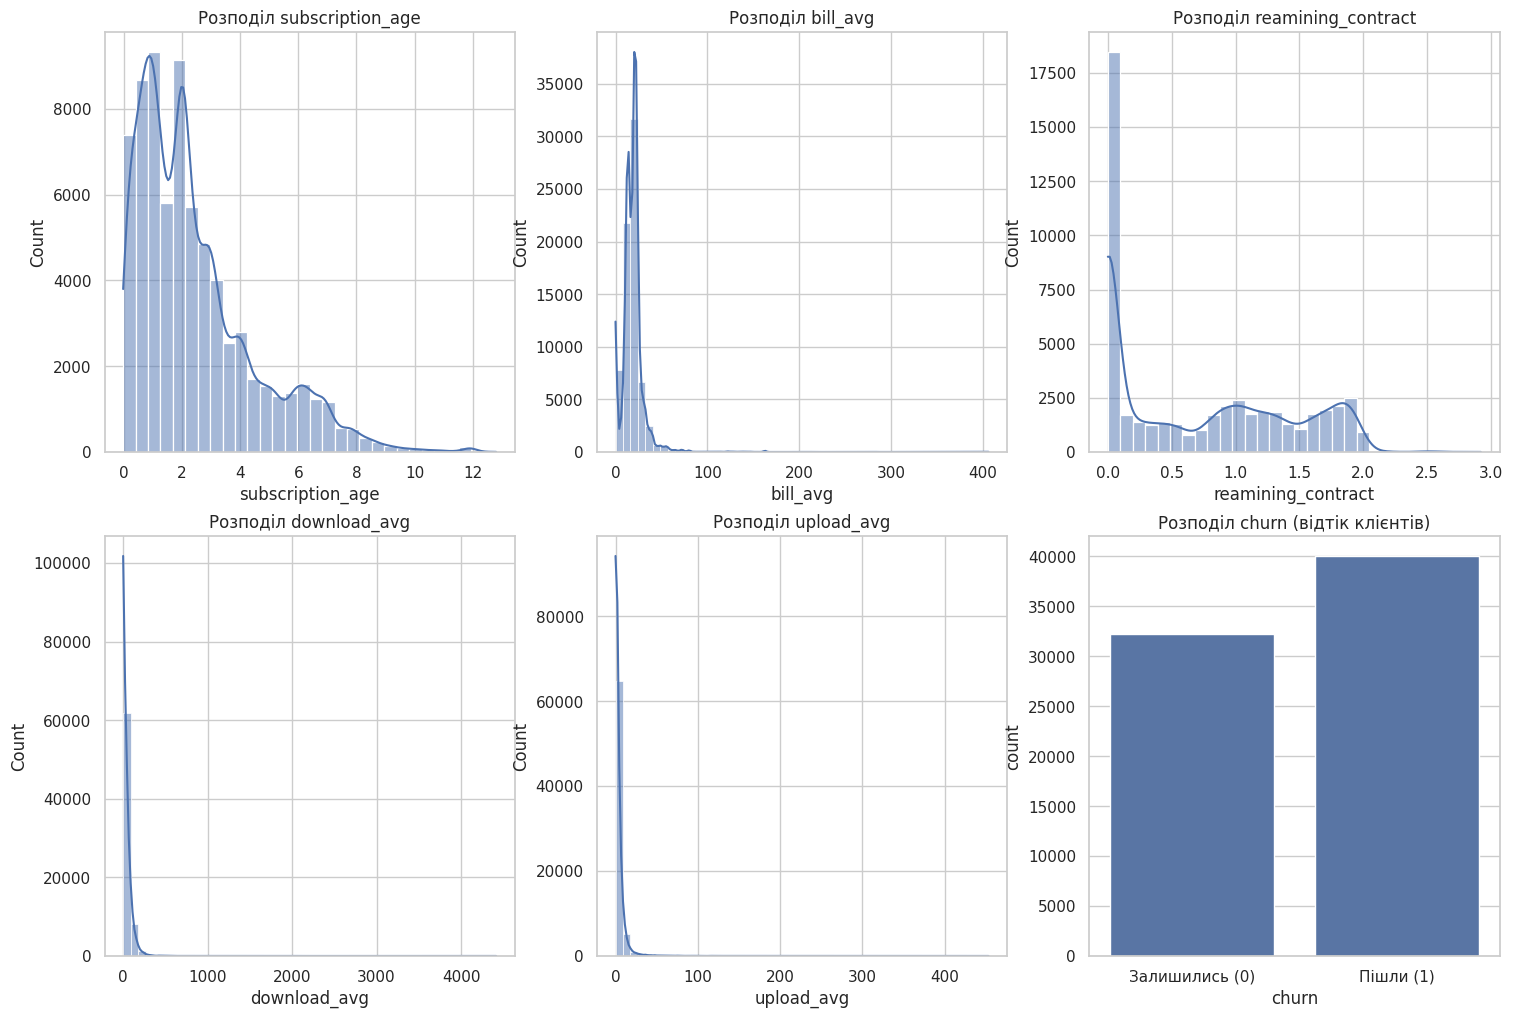

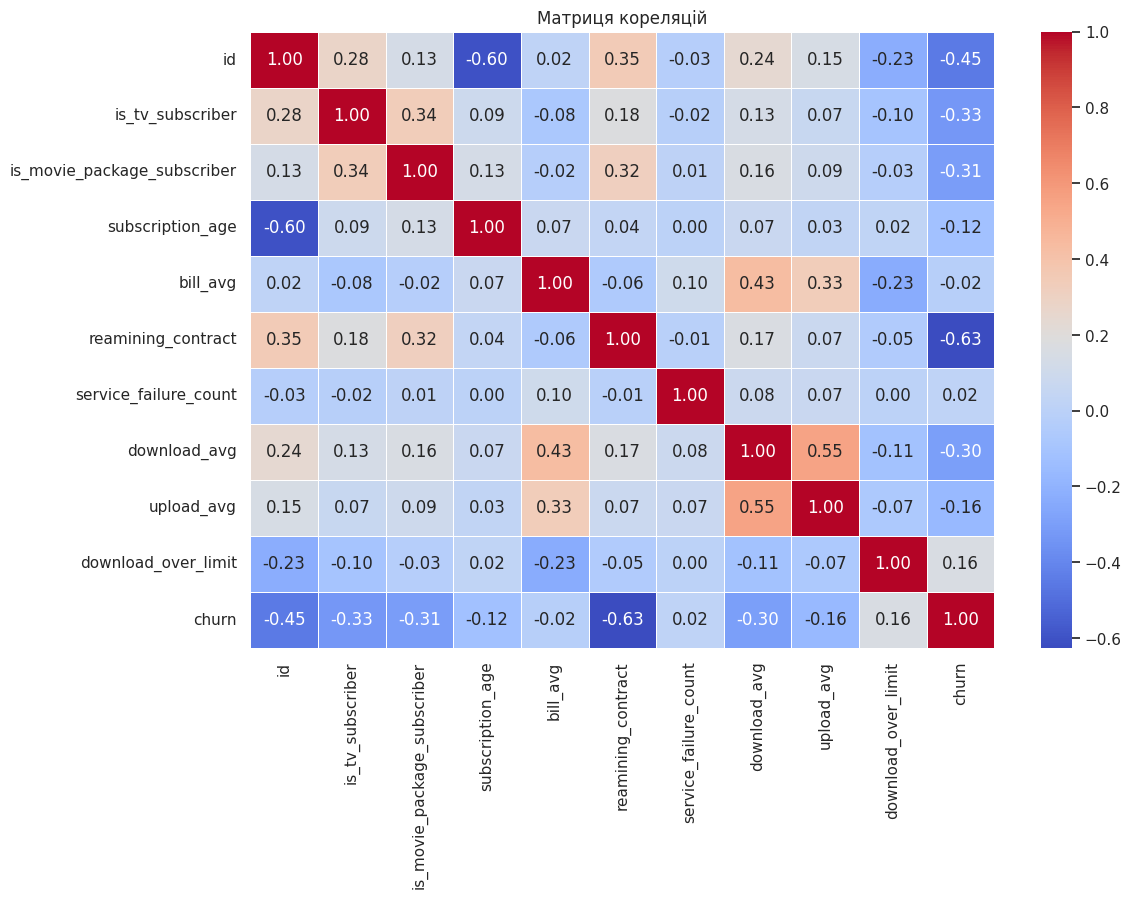

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "internet_service_churn.csv"
df = pd.read_csv(file_path)

df_head = df.head()
df_info = df.info()
df_description = df.describe()

df_head, df_description

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sns.histplot(df['subscription_age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Розподіл subscription_age")

sns.histplot(df['bill_avg'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Розподіл bill_avg")

sns.histplot(df['reamining_contract'].dropna(), bins=30, kde=True, ax=axes[0, 2])
axes[0, 2].set_title("Розподіл reamining_contract")

sns.histplot(df['download_avg'].dropna(), bins=50, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Розподіл download_avg")

sns.histplot(df['upload_avg'].dropna(), bins=50, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Розподіл upload_avg")

sns.countplot(x='churn', data=df, ax=axes[1, 2])
axes[1, 2].set_title("Розподіл churn (відтік клієнтів)")
axes[1, 2].set_xticklabels(["Залишились (0)", "Пішли (1)"])

plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Матриця кореляцій")
plt.show()